# Implement the random forest algorithm

## Why implement the random forest algorithm
  The random forest algorithm is an ensemble algorithm using multiple decision trees provide an output. As an ensemble algorithm, it aggregates the predictions of many “sub-algorithms” (in this case, decision trees) to generate a final output, by averaging the results in regression. It can however be computationally heavy, and must therefore be used cautiously. 
  Because many of the decision trees are non-linear, random forest will be effective in providing non-linear relationships between features and the target variable. 


## Important parameters
When creating a random forest algorithm, 

In [13]:
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import  mean_squared_error
import warnings

df = pd.read_csv("klar_for_oppgave_5.csv")
df_test = pd.read_csv("test.csv")
df_train = pd.read_csv("train.csv")
df_val = pd.read_csv("validation.csv")

# Define the features (PLS components)
X_train = df_train.drop(columns=["Close","Date"])  # Drop the target column

# Define the target (Close price)
y_train = df_train["Close"]

# Define the features (PLS components)
X_val = df_val.drop(columns=["Close","Date"])  # Drop the target column

# Define the target (Close price)
y_val = df_val["Close"]

# Define the features (PLS components)
X_test = df_test.drop(columns=["Close","Date"])  # Drop the target column

# Define the target (Close price)
y_test = df_test["Close"]



# Create a Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the regressor
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_regressor.predict(X_val)

# Evaluate the model
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

# Print the results
print(mse,r2)

0.09513232204898335 -0.659370310064956


Max Depth: 3, Test MSE: 0.09509465113668847
Max Depth: 5, Test MSE: 0.098497138242512
Max Depth: 10, Test MSE: 0.09556752878778284
Max Depth: 15, Test MSE: 0.09527840560109717
Max Depth: 20, Test MSE: 0.09514191241194656
Max Depth: None, Test MSE: 0.09513232204898335


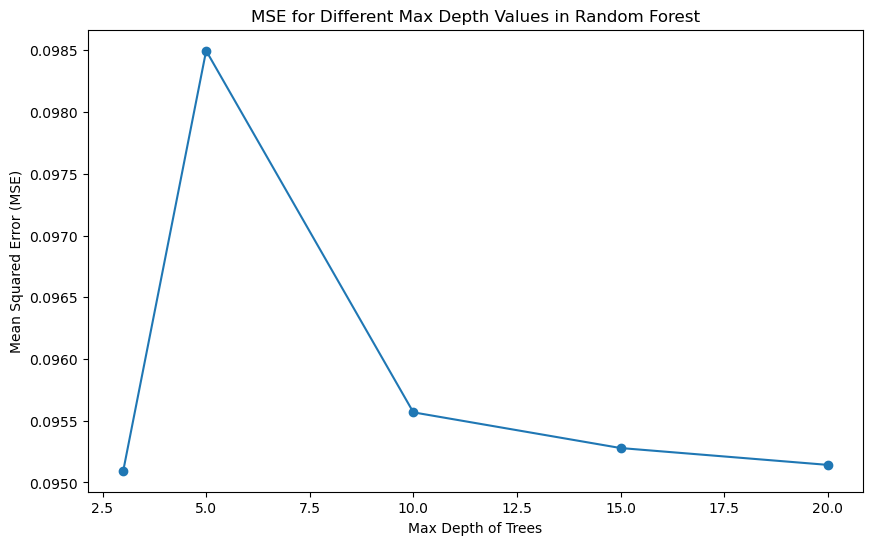

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


# Define a list of different max_depth values to evaluate
max_depth_values = [3, 5, 10, 15, 20, None]  # None means no limit on depth
mse_scores = []

# Loop through each max_depth value
for max_depth in max_depth_values:
    # Create a Random Forest Regressor with the current max_depth
    rf_regressor = RandomForestRegressor(n_estimators=100, max_depth=max_depth, random_state=42)
    
    # Train the regressor
    rf_regressor.fit(X_train, y_train)
    
    # Predict on the test set
    y_val_pred = rf_regressor.predict(X_val)
    
    # Calculate the Mean Squared Error (MSE) for this max_depth
    mse = mean_squared_error(y_val, y_val_pred)
    mse_scores.append(mse)
    
    # Print the MSE for the current max_depth
    print(f"Max Depth: {max_depth}, Test MSE: {mse}")

# Plotting MSE vs. max_depth values
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, mse_scores, marker='o', linestyle='-')
plt.xlabel("Max Depth of Trees")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("MSE for Different Max Depth Values in Random Forest")
plt.show()

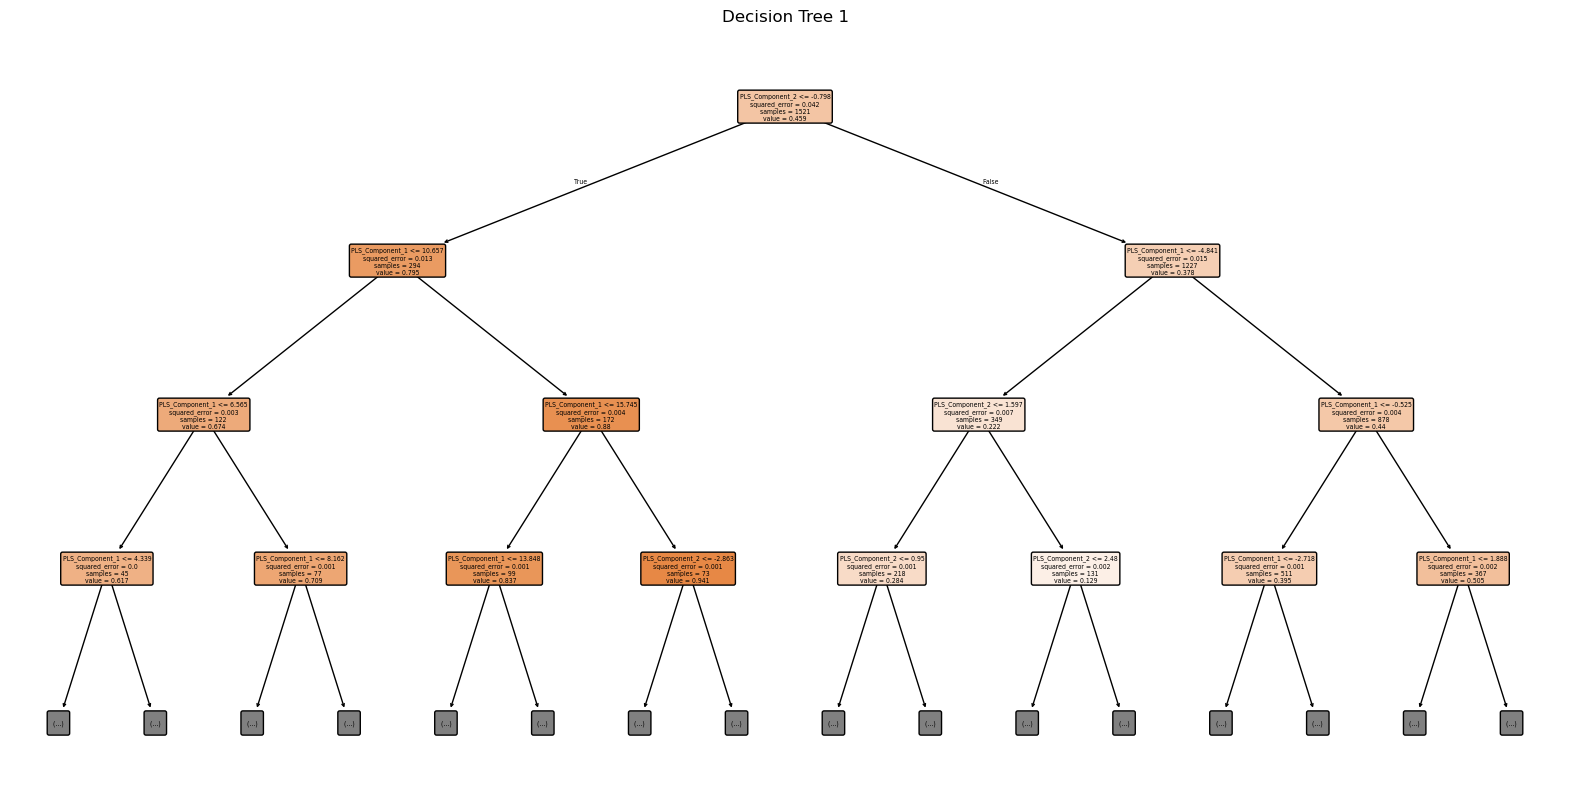

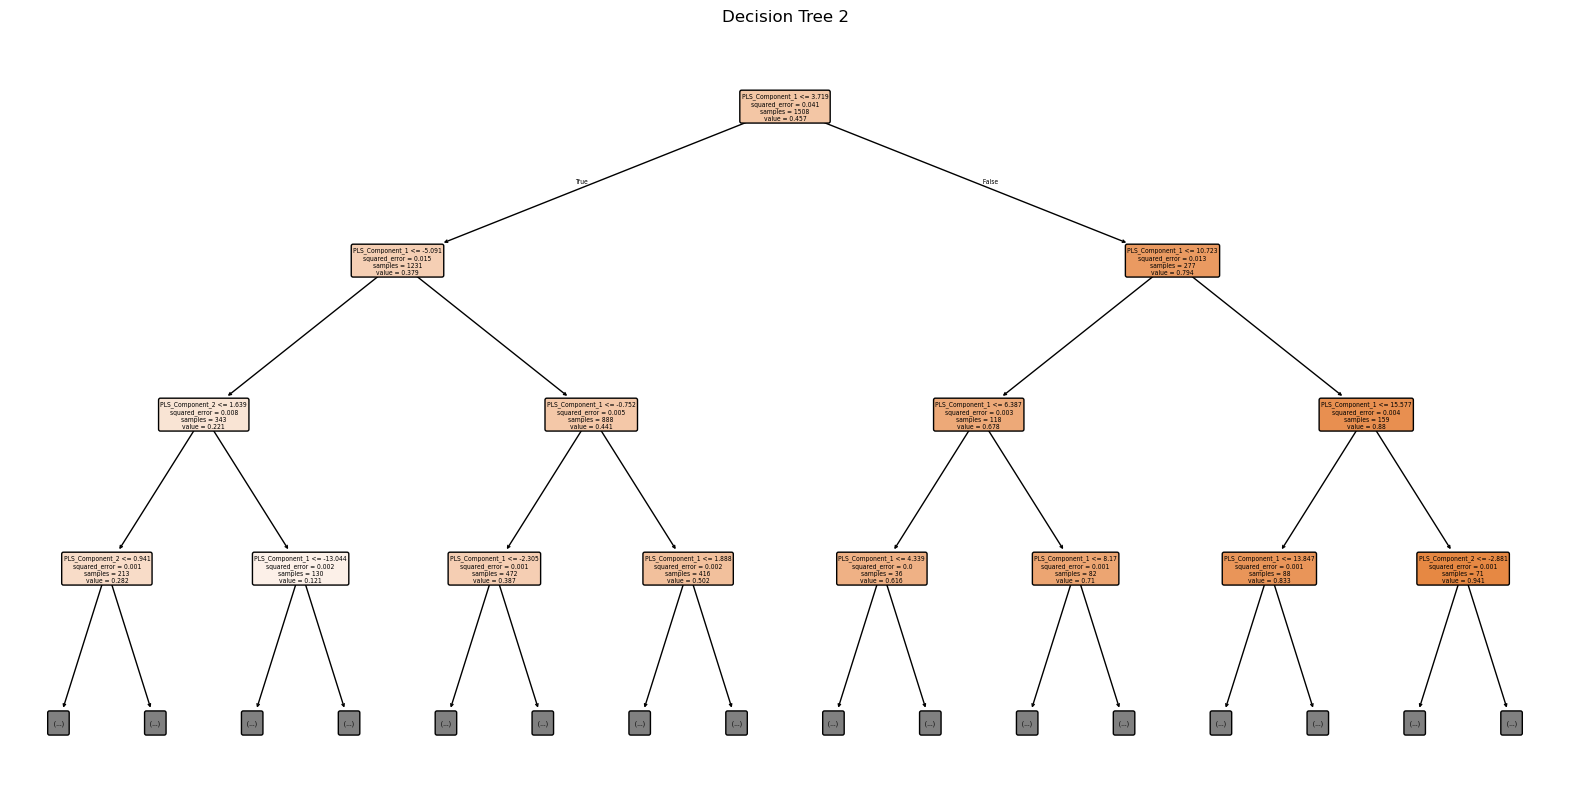

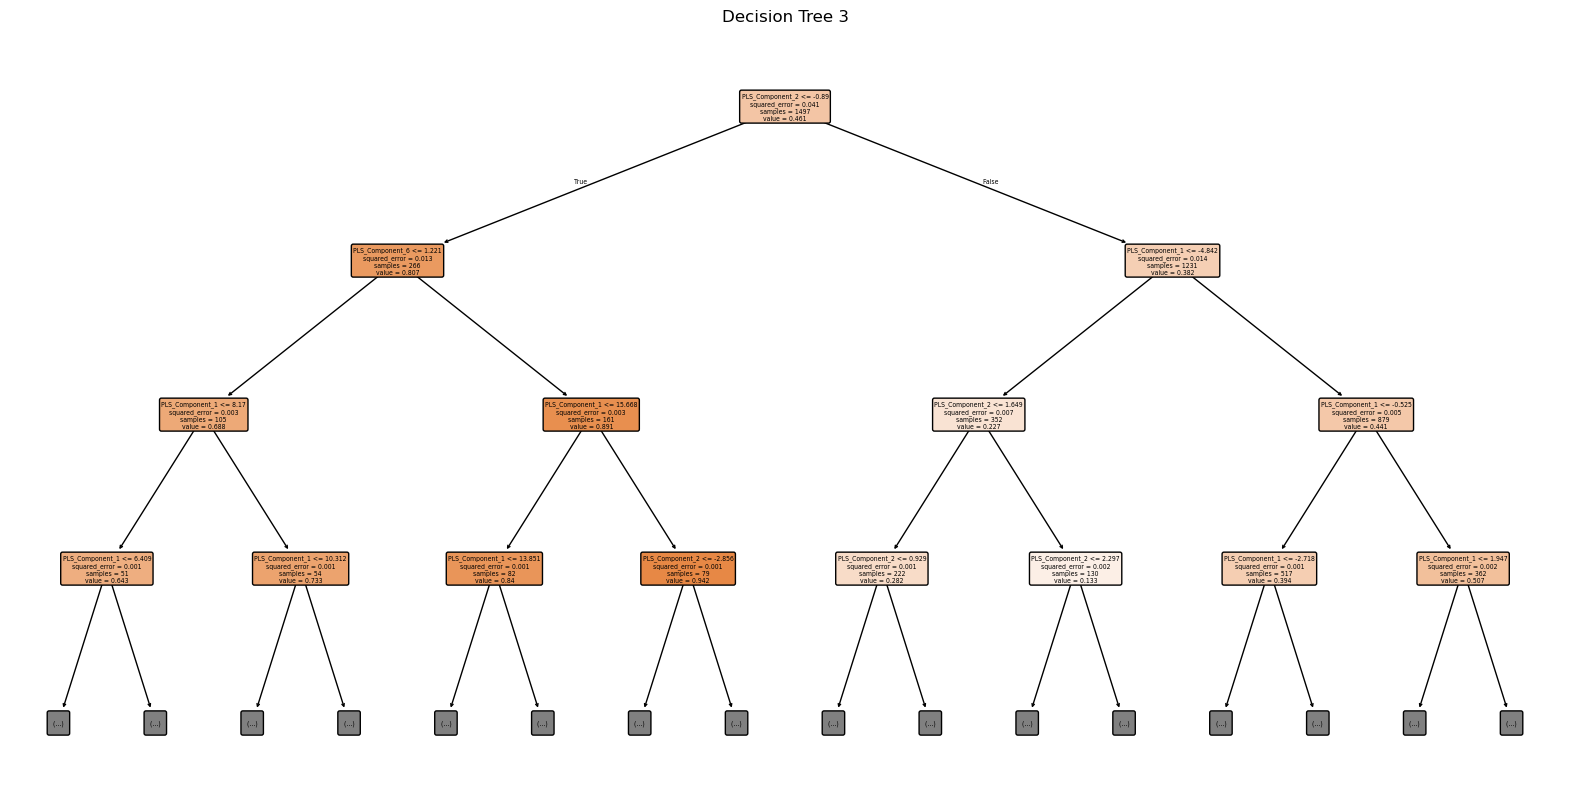

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Create a Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the regressor
rf_regressor.fit(X_train, y_train)

# Visualize a few trees in the forest using plot_tree
for i in range(3):  # Display the first 3 trees
    plt.figure(figsize=(20, 10))
    plot_tree(rf_regressor.estimators_[i], feature_names=X_train.columns, filled=True, rounded=True, max_depth=3)
    plt.title(f"Decision Tree {i+1}")   
    plt.show()